# 10-1 : knn classifier with mnist dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist_dataset = fetch_openml('mnist_784',
                             as_frame = False)

print(mnist_dataset.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
def mnist_stratified_sampling(target):
    '''각 숫자별로 1100개씩 총 11000개 샘플 추출'''
    np.random.seed(20152410)
    index_list = [np.random.permutation(np.where(target == i)[0])[:1100]
                  for i in range(10)]
    index = np.concatenate(index_list)
    
    return index

In [4]:
X = mnist_dataset['data']
y = mnist_dataset['target'].astype('int')

sample_index = mnist_stratified_sampling(y)
X_small = X[sample_index]
y_small = y[sample_index]

from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits = 11)

for train_index, test_index in stratified_kfold.split(X_small, y_small):
    # train : 10000, test : 1000
    X_train, X_test = X_small[train_index], X_small[test_index]
    y_train, y_test = y_small[train_index], y_small[test_index]

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10000, 784), (1000, 784), (10000,), (1000,))

In [6]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_list = list(range(3, 8))

knn_uniform_cv_score = [cross_val_score(KNeighborsClassifier(n_neighbors = k, weights = 'uniform'),
                                        cv = 3,
                                        X = X_train,
                                        y = y_train,
                                        scoring = make_scorer(accuracy_score)).mean() for k in k_neighbors_list]

knn_distance_cv_score = [cross_val_score(KNeighborsClassifier(n_neighbors = k, weights = 'distance'),
                                         cv = 3,
                                         X = X_train,
                                         y = y_train,
                                         scoring = make_scorer(accuracy_score)).mean() for k in k_neighbors_list]

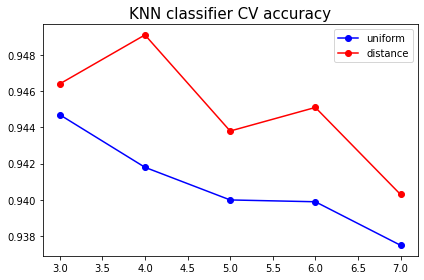

In [7]:
plt.figure(figsize = (6, 4))
plt.plot(k_neighbors_list, knn_uniform_cv_score, 'bo-', label = 'uniform')
plt.plot(k_neighbors_list, knn_distance_cv_score, 'ro-', label = 'distance')

plt.title('KNN classifier CV accuracy', fontsize = 15)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

best_k = 4
best_weights = 'distance'

best_knn_clf = KNeighborsClassifier(n_neighbors = best_k,
                                    weights = best_weights)
best_knn_clf.fit(X_train, y_train)
knn_y_pred = best_knn_clf.predict(X_test)

In [9]:
print("KNN classifier test accuracy : ", accuracy_score(y_test, knn_y_pred))
print("\n")
print(confusion_matrix(y_test, knn_y_pred))
print("\n")
print(classification_report(y_test, knn_y_pred))

KNN classifier test accuracy :  0.952


[[99  0  0  0  0  1  0  0  0  0]
 [ 0 99  1  0  0  0  0  0  0  0]
 [ 1  0 92  0  2  0  0  5  0  0]
 [ 0  0  1 93  1  4  0  0  1  0]
 [ 0  3  0  0 92  0  0  1  0  4]
 [ 1  1  0  1  0 95  1  0  0  1]
 [ 2  0  0  0  0  1 97  0  0  0]
 [ 0  1  0  1  0  0  0 98  0  0]
 [ 1  1  0  1  1  2  0  0 92  2]
 [ 0  1  0  0  1  0  0  3  0 95]]


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       100
           1       0.93      0.99      0.96       100
           2       0.98      0.92      0.95       100
           3       0.97      0.93      0.95       100
           4       0.95      0.92      0.93       100
           5       0.92      0.95      0.94       100
           6       0.99      0.97      0.98       100
           7       0.92      0.98      0.95       100
           8       0.99      0.92      0.95       100
           9       0.93      0.95      0.94       100

    accuracy                   

# 10-2 : mlp classifier with mnist dataset

In [10]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes = 128,
                        early_stopping = True,
                        random_state = 20152410)
mlp_clf.fit(X_train, y_train)
mlp_y_pred = mlp_clf.predict(X_test)

In [11]:
print("MLP classifier test accuracy : ", accuracy_score(y_test, mlp_y_pred))
print("\n")
print(confusion_matrix(y_test, mlp_y_pred))
print("\n")
print(classification_report(y_test, mlp_y_pred))

MLP classifier test accuracy :  0.928


[[96  0  1  0  0  0  1  0  1  1]
 [ 0 97  1  0  1  0  0  0  1  0]
 [ 0  1 94  0  1  0  1  2  1  0]
 [ 0  0  3 92  0  1  0  0  4  0]
 [ 1  0  0  0 92  0  2  0  1  4]
 [ 0  0  1  2  1 86  2  0  7  1]
 [ 1  0  1  0  0  2 95  0  1  0]
 [ 1  1  3  0  0  0  0 92  1  2]
 [ 0  0  2  1  0  2  2  0 93  0]
 [ 0  0  0  1  2  0  0  6  0 91]]


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.98      0.97      0.97       100
           2       0.89      0.94      0.91       100
           3       0.96      0.92      0.94       100
           4       0.95      0.92      0.93       100
           5       0.95      0.86      0.90       100
           6       0.92      0.95      0.94       100
           7       0.92      0.92      0.92       100
           8       0.85      0.93      0.89       100
           9       0.92      0.91      0.91       100

    accuracy                   

# 10-3 : naive bayes with mnist dataset

In [12]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_y_pred = gnb_clf.predict(X_test)

In [13]:
print("GaussianNB classifier test accuracy : ", accuracy_score(y_test, gnb_y_pred))
print("\n")
print(confusion_matrix(y_test, gnb_y_pred))
print("\n")
print(classification_report(y_test, gnb_y_pred))

GaussianNB classifier test accuracy :  0.582


[[90  1  1  0  0  0  2  0  3  3]
 [ 0 97  0  0  0  0  2  0  1  0]
 [ 5  9 24 21  2  1 22  0 13  3]
 [ 4 11  1 72  0  0  4  1  2  5]
 [ 5  3  0  3 21  1 16  4  4 43]
 [16  9  1 14  0  9  8  0 32 11]
 [ 1  2  0  1  0  1 94  0  1  0]
 [ 1  1  0  3  0  1  0 41  0 53]
 [ 2 26  0  3  1  0  4  0 39 25]
 [ 0  2  0  1  1  1  0  0  0 95]]


              precision    recall  f1-score   support

           0       0.73      0.90      0.80       100
           1       0.60      0.97      0.74       100
           2       0.89      0.24      0.38       100
           3       0.61      0.72      0.66       100
           4       0.84      0.21      0.34       100
           5       0.64      0.09      0.16       100
           6       0.62      0.94      0.75       100
           7       0.89      0.41      0.56       100
           8       0.41      0.39      0.40       100
           9       0.40      0.95      0.56       100

    accuracy            

In [14]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)
mnb_y_pred = mnb_clf.predict(X_test)

In [15]:
print("MultinomialNB classifier test accuracy : ", accuracy_score(y_test, mnb_y_pred))
print("\n")
print(confusion_matrix(y_test, mnb_y_pred))
print("\n")
print(classification_report(y_test, mnb_y_pred))

MultinomialNB classifier test accuracy :  0.816


[[84  0  1  0  0  2  3  0 10  0]
 [ 0 93  1  1  0  0  0  0  5  0]
 [ 1  2 78  3  3  0  5  1  7  0]
 [ 1  1  5 82  1  4  0  0  6  0]
 [ 0  1  1  0 69  2  4  0  7 16]
 [ 1  2  0 12  0 65  3  0 15  2]
 [ 1  1  0  0  0  3 94  0  1  0]
 [ 1  3  0  0  2  0  0 83  3  8]
 [ 1  4  0  1  1  1  1  0 84  7]
 [ 0  1  0  0  7  0  0  5  3 84]]


              precision    recall  f1-score   support

           0       0.93      0.84      0.88       100
           1       0.86      0.93      0.89       100
           2       0.91      0.78      0.84       100
           3       0.83      0.82      0.82       100
           4       0.83      0.69      0.75       100
           5       0.84      0.65      0.73       100
           6       0.85      0.94      0.90       100
           7       0.93      0.83      0.88       100
           8       0.60      0.84      0.70       100
           9       0.72      0.84      0.77       100

    accuracy         

# 10-4 : logistic regression with iris dataset

In [16]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris_dataset = load_iris()

print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
iris_X = iris_dataset['data']
iris_X_sepal = iris_X[:, 0:2]
iris_y = iris_dataset['target']

In [18]:
logistic_clf = LogisticRegression()
logistic_clf.fit(iris_X_sepal, iris_y)
logistic_y_pred = logistic_clf.predict(iris_X_sepal)

In [19]:
logistic_clf.intercept_, logistic_clf.coef_

(array([ 7.91322129,  1.84504714, -9.75826843]),
 array([[-2.70890249,  2.32402378],
        [ 0.61273259, -1.57058803],
        [ 2.0961699 , -0.75343574]]))

In [20]:
X_new = [[5.7, 1.5]]
print(iris_dataset.target_names)
print(np.round(logistic_clf.predict_proba(X_new), 3))
print(logistic_clf.predict(X_new))

['setosa' 'versicolor' 'virginica']
[[0.001 0.872 0.128]]
[1]


In [21]:
print("logistic classifier accuracy : ", accuracy_score(iris_y, logistic_y_pred))
print("\n")
print(confusion_matrix(iris_y, logistic_y_pred))
print("\n")
print(classification_report(iris_y, logistic_y_pred))

logistic classifier accuracy :  0.82


[[50  0  0]
 [ 0 37 13]
 [ 0 14 36]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.73      0.74      0.73        50
           2       0.73      0.72      0.73        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



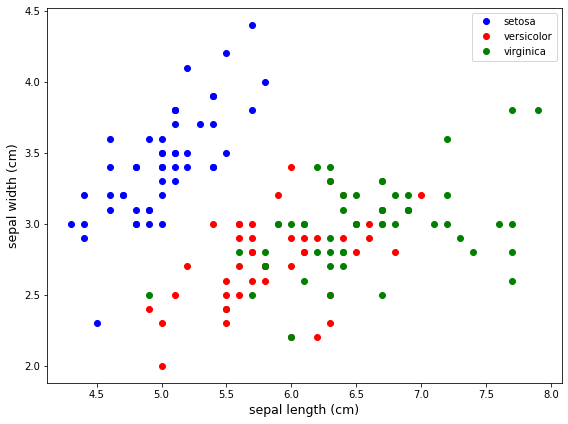

In [22]:
plt.figure(figsize = (8, 6))
color = ['bo', 'ro', 'go']

for i in range(3):
    plt.plot(iris_X_sepal[np.where(iris_y == i)[0], 0],
             iris_X_sepal[np.where(iris_y == i)[0], 1],
             color[i],
             label = iris_dataset.target_names[i])

plt.xlabel(iris_dataset.feature_names[0], fontsize = 12.5)
plt.ylabel(iris_dataset.feature_names[1], fontsize = 12.5)
plt.legend()
plt.tight_layout()
plt.show()

# 10-5 : lda softmax classification with iris dataset

In [23]:
from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits = 5)

for train_index, test_index in stratified_kfold.split(iris_X, iris_y):
    # train : 120 (40, 40, 40), test : 30 (10, 10, 10)
    iris_X_train = iris_X[train_index]
    iris_X_test = iris_X[test_index]

    iris_y_train = iris_y[train_index]
    iris_y_test = iris_y[test_index]

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(iris_X_train, iris_y_train)
lda_y_train_pred = lda_clf.predict(iris_X_train) 
lda_y_test_pred = lda_clf.predict(iris_X_test)

In [25]:
print("LDA classifier train accuracy : ", accuracy_score(iris_y_train, lda_y_train_pred))
print("LDA classifier test accuracy : ", accuracy_score(iris_y_test, lda_y_test_pred))
print("\n")
print(confusion_matrix(iris_y_test, lda_y_test_pred))
print("\n")
print(classification_report(iris_y_test, lda_y_test_pred))

LDA classifier train accuracy :  0.975
LDA classifier test accuracy :  1.0


[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

